In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg
import glob

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [11]:
def extract_potential(ifile):
    ifile = open(ifile,"r").readlines()
    dict_energy = {}
    for lines in ifile:
        shell = float(lines.split(",")[0])
        nrg = float(lines.split(",")[1])
        stddev = float(lines.split(",")[2])
        dict_energy[shell] = [nrg,stddev]
    #now sort out the dictionary
    new_dict_energy = {}
    
    shells.sort()
    for shell in shells:
        new_dict_energy[shell] = [dict_energy[shell][0],dict_energy[shell][1]]
    #now refill the lists
    del dict_energy
    nrgs, stddevs = [],[]
    for shell in shells:
        nrgs.append(new_dict_energy[shell][0])
        stddevs.append(new_dict_energy[shell][1])
        
    return shells,nrgs,stddevs
        

In [14]:
BWRFshell,BWRFnrg,BWRFerr = extract_potential("BWRF.csv") #BWRF computed as the sum of charge-charge-charge
RF_c_d_s,RF_c_d_n,RF_c_d_err = extract_potential("RF_charge_dipole.csv")#RF charge-dipole interaction, q*mu *cos(theta)
AVGRF_s,AVGRF_n,AVGRF_err = extract_potential("AVG_RF_dipole.csv")#AVG ROT RF field computed by using waters' 
#COMs as position
AVGRF_int_s,AVGRF_int_n,AVGRF_int_err = extract_potential("AVG_RF_int_dipole.csv")#AVG computed as N times the 
#potential at the middle of the shell
water_s, water_n,water_err = extract_potential("waters.csv")# average nubmer of waters along with error

#save the shell 
shells = []
for shell in water_s:
    shells.append(shell)


/home/steboss/Simulation/charge-dipole/avg_dipole/sire_test/orientational_correlation/output/output_average_0.50


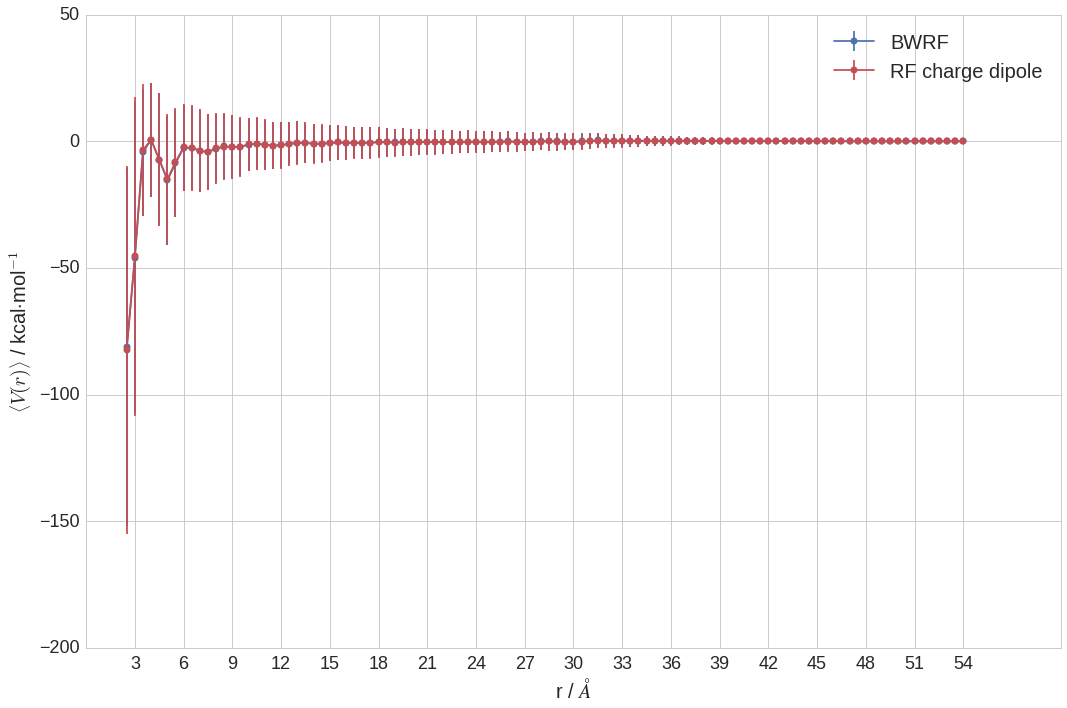

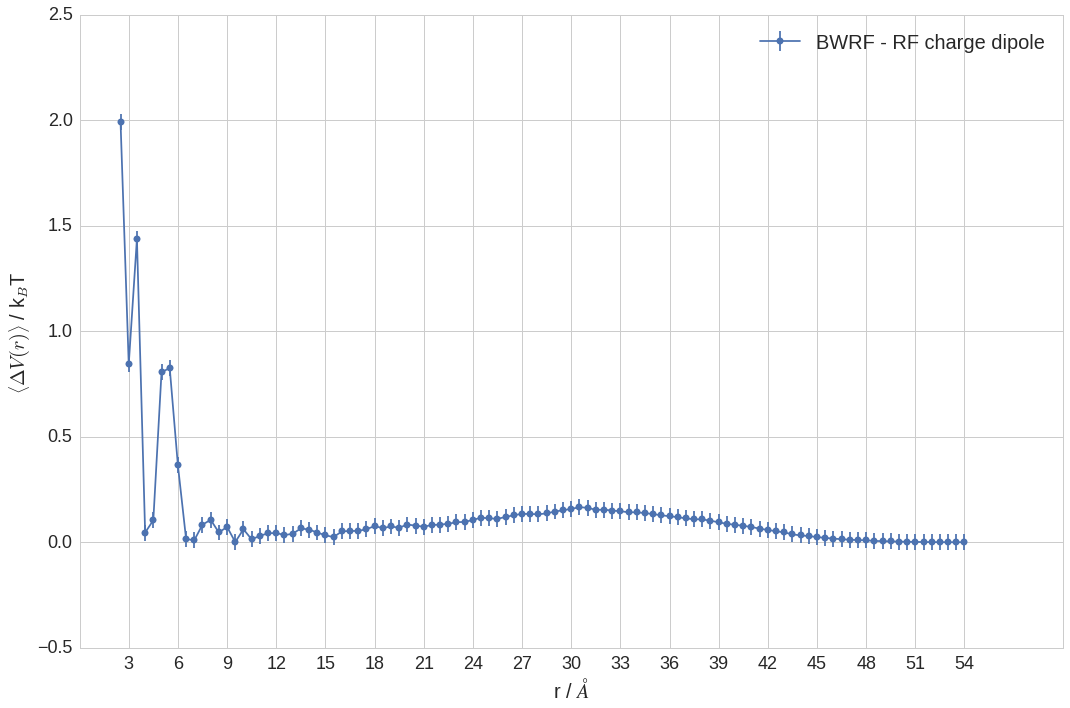

In [31]:
#plot of BWRF and RF charge-dipole at short distance
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF
ax.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#RF charge-dipole interaction 
ax.errorbar(RF_c_d_s,RF_c_d_n,color=color[2],yerr=RF_c_d_err,marker="o",label="RF charge dipole")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
plt.xticks(np.arange(3, 55, 3.0))

#ax.set_xlim(1,10)
#ax.set_ylim(-40,30)
#
#ax.set_xlim(3,10)
#ax.set_ylim(-50,0)
plt.tight_layout()

#print differences
diffsRF = []
diffserr = [] 
for i,val in enumerate(BWRFnrg,0):
    diffRF = abs(val - RF_c_d_n[i])/0.592
    diffsRF.append(diffRF)
    
    diffserr = math.sqrt(BWRFerr[i]**2+RF_c_d_err[i]**2)/0.592
#for i,val in enumerate(BWRFshell,0):
#    print("Difference at %.4f is %.4f kBT" % (val, diffsRF[i]))

#plot the difference
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF
ax.errorbar(BWRFshell,diffsRF,color=color[0],yerr=diffserr,marker="o",label="BWRF - RF charge dipole")
ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle \Delta V(r) \right \rangle$ / k$_B$T" ,fontsize=20)
ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
#ax.set_xlim(1,10)
#ax.set_ylim(-40,30)
#
#ax.set_xlim(3,10)
#ax.set_ylim(-50,0)
plt.xticks(np.arange(3, 55, 3.0))

plt.tight_layout()

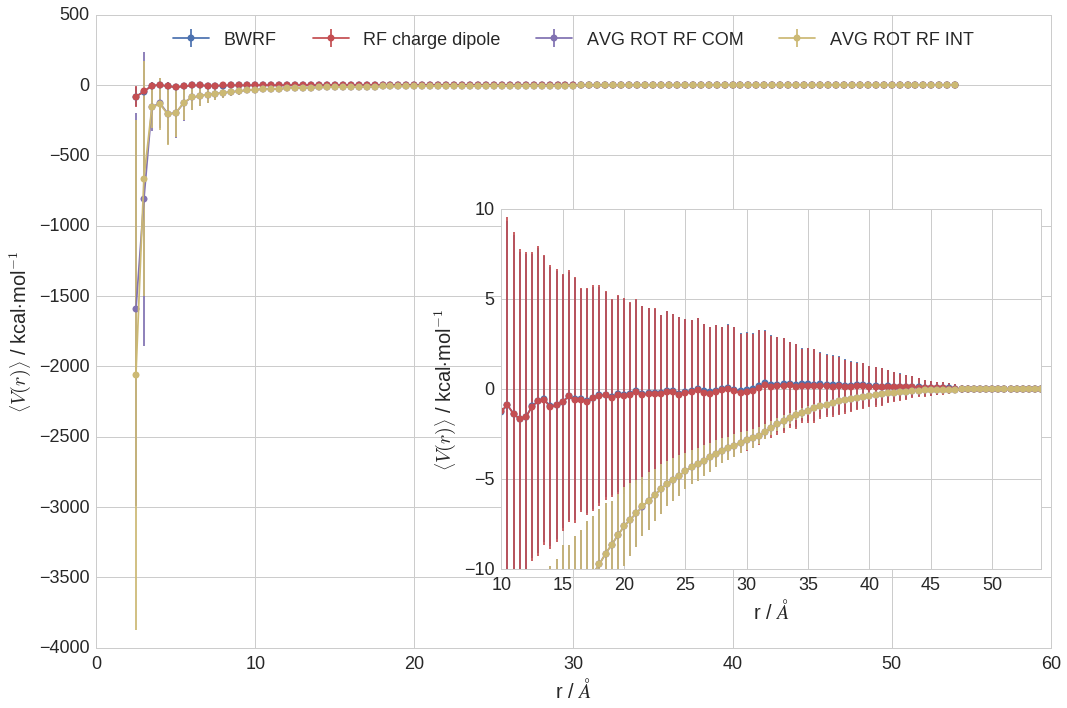

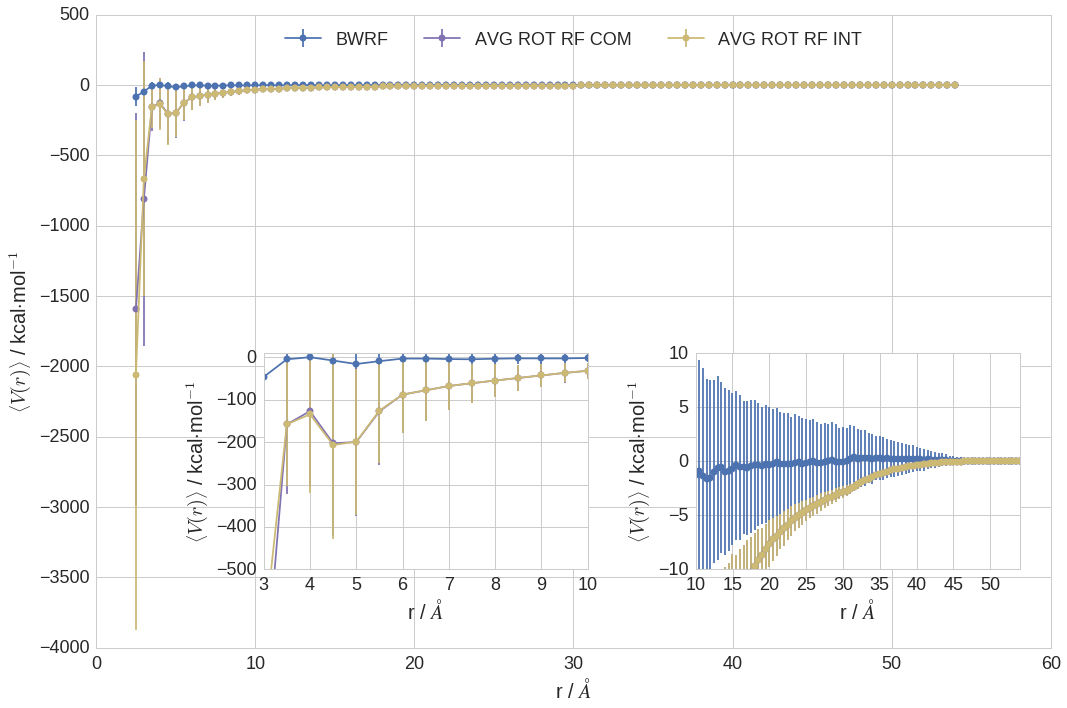

In [32]:
#plot
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF
ax.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#RF charge-dipole interaction 
ax.errorbar(RF_c_d_s,RF_c_d_n,color=color[2],yerr=RF_c_d_err,marker="o",label="RF charge dipole")
#AVG ROT RF
ax.errorbar(AVGRF_s,AVGRF_n,color=color[3],yerr=AVGRF_err,marker="o",label="AVG ROT RF COM")
#AVG ROT RF integrated
ax.errorbar(AVGRF_int_s,AVGRF_int_n,color=color[4],yerr=AVGRF_int_err,marker="o",label="AVG ROT RF INT")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),ncol=4, fancybox=True, shadow=True,fontsize=18)
#ax.set_xlim(10,54)
#ax.set_ylim(-10,10)
#
#ax.set_xlim(3,10)
#ax.set_ylim(-50,0)
plt.tight_layout()


##add the INSET with xlim 10,54
left, bottom, width, height = [0.47, 0.2, 0.5, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])
#BWRF
ax2.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#RF charge-dipole interaction 
ax2.errorbar(RF_c_d_s,RF_c_d_n,color=color[2],yerr=RF_c_d_err,marker="o",label="RF charge dipole")
#AVG ROT RF
ax2.errorbar(AVGRF_s,AVGRF_n,color=color[3],yerr=AVGRF_err,marker="o",label="AVG ROT RF COM")
#AVG ROT RF integrated
ax2.errorbar(AVGRF_int_s,AVGRF_int_n,color=color[4],yerr=AVGRF_int_err,marker="o",label="AVG ROT RF INT")

ax2.set_xlabel("r / $\AA$",fontsize=20)
ax2.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax2.legend(loc="best",fontsize=20)
ax2.tick_params(labelsize=18)
ax2.set_xlim(10,54)
ax2.set_ylim(-10,10)
plt.tight_layout()#
        
    
    
#COMPARISON BWRF and AVG                  
#BWRF
fig, ax3 = plt.subplots(figsize=(15,10))                   
ax3.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#AVG ROT RF
ax3.errorbar(AVGRF_s,AVGRF_n,color=color[3],yerr=AVGRF_err,marker="o",label="AVG ROT RF COM")
#AVG ROT RF integrated
ax3.errorbar(AVGRF_int_s,AVGRF_int_n,color=color[4],yerr=AVGRF_int_err,marker="o",label="AVG ROT RF INT")

ax3.set_xlabel("r / $\AA$",fontsize=20)
ax3.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),ncol=3, fancybox=True, shadow=True,fontsize=18)
ax3.tick_params(labelsize=18)
plt.tight_layout()

##add the INSET for comparison BWRF-AVG for x 3-10
left, bottom, width, height = [0.25, 0.2, 0.3, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
#BWRF
ax4.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#AVG ROT RF
ax4.errorbar(AVGRF_s,AVGRF_n,color=color[3],yerr=AVGRF_err,marker="o",label="AVG ROT RF COM")
#AVG ROT RF integrated
ax4.errorbar(AVGRF_int_s,AVGRF_int_n,color=color[4],yerr=AVGRF_int_err,marker="o",label="AVG ROT RF INT")

ax4.set_xlabel("r / $\AA$",fontsize=20)
ax4.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax2.legend(loc="best",fontsize=20)
ax4.tick_params(labelsize=18)
ax4.set_xlim(3,10)
ax4.set_ylim(-500,10)
plt.tight_layout()#

##add the INSET for comparison BWRF-AVG for x 10-54
left, bottom, width, height = [0.65, 0.2, 0.3, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
#BWRF
ax4.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#AVG ROT RF
ax4.errorbar(AVGRF_s,AVGRF_n,color=color[3],yerr=AVGRF_err,marker="o",label="AVG ROT RF COM")
#AVG ROT RF integrated
ax4.errorbar(AVGRF_int_s,AVGRF_int_n,color=color[4],yerr=AVGRF_int_err,marker="o",label="AVG ROT RF INT")

ax4.set_xlabel("r / $\AA$",fontsize=20)
ax4.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax2.legend(loc="best",fontsize=20)
ax4.tick_params(labelsize=18)
ax4.set_xlim(10,54)
ax4.set_ylim(-10,10)
plt.tight_layout()#
plt.savefig("Figure4B_BWRF_AVG_diff.png",dpi=300)

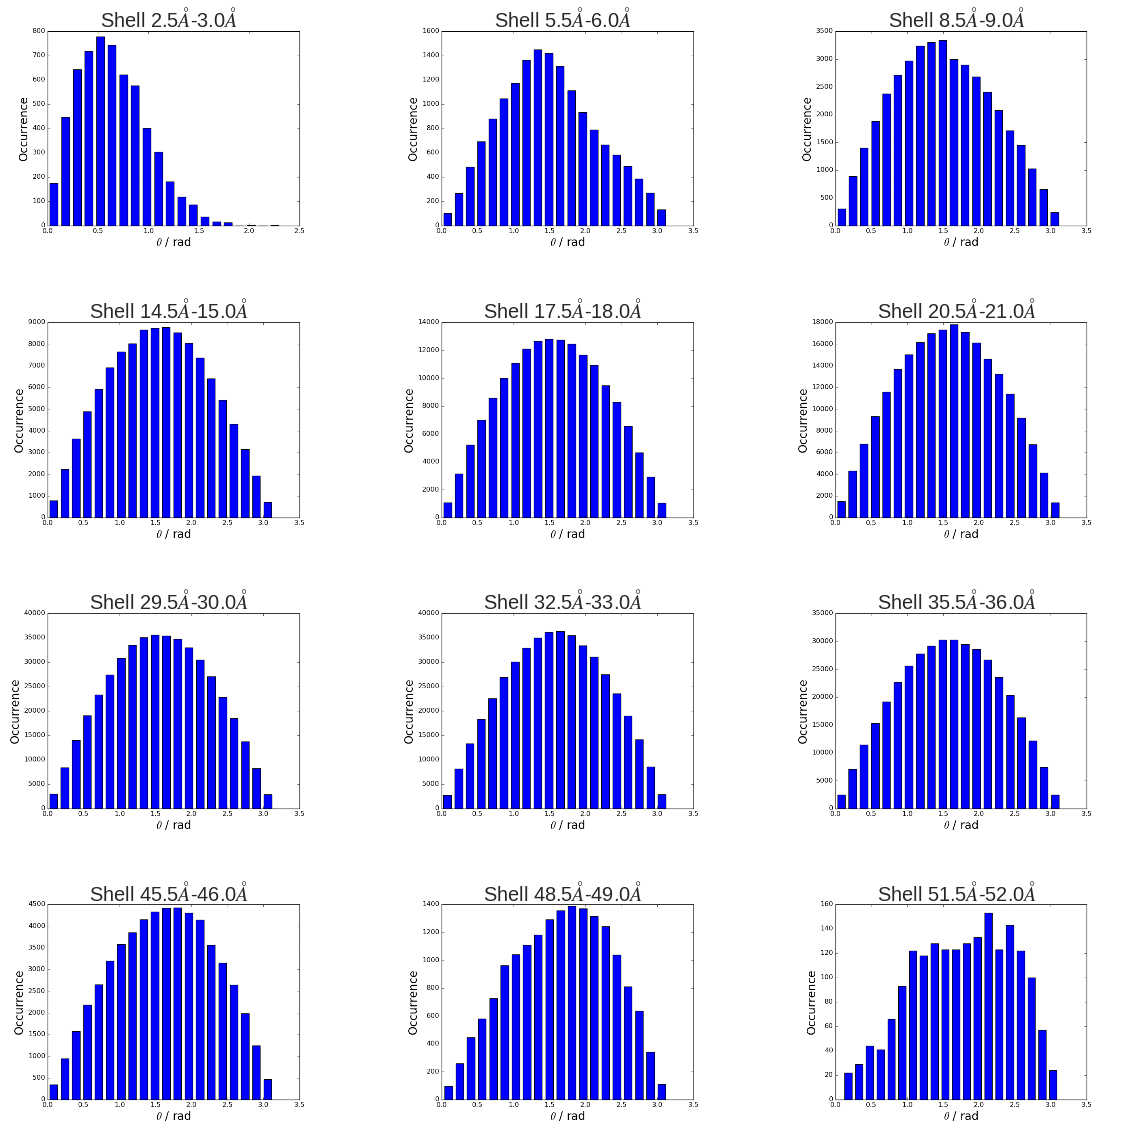

In [34]:
import matplotlib.image as mpimg
#show the angle histogram for shells 3,6,9 // 15,18,21// 30,33,36 // 46,49,52 A
shells = [ 3,6,9,15,18,21,30,33,36,46,49,52]

#prepare the subplot array
fig = plt.figure(figsize=(20,20))

counter = 1
for shell in shells:
    imgname = "../angle_test/output_single_2500_5000_0.50/hist_%.4f.png" % shell
    imag = mpimg.imread(imgname)
    plt.subplot(4,3,counter,frameon=False,xticks=[],yticks=[],aspect='auto')
    plt.imshow(imag)
    plt.title("Shell %.1f$\AA$-%.1f$\AA$" % (shell-0.5,shell),y=0.9,fontsize=20 )
    counter+=1

#plt.savefig("TEST.png",dpi=300)

plt.savefig("Figure6B_05width_orientational.png",dpi=300)

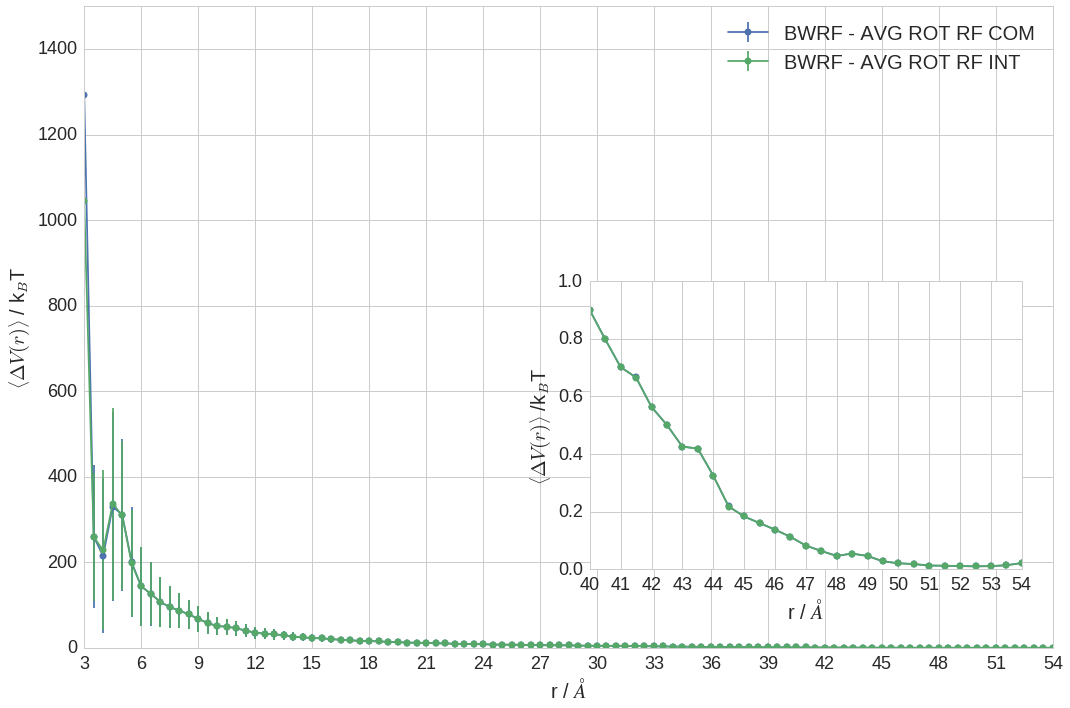

In [35]:
diffsCOM = []
errsCOM = []
diffsINT = []
errsINT = []
for i,val in enumerate(BWRFnrg,0):
    diffCOM = (val - AVGRF_n[i])/0.592
    errCOM = math.sqrt(BWRFerr[i]**2 + AVGRF_err[i]**2)
    diffINT = (val - AVGRF_int_n[i])/0.592
    errINT = math.sqrt(BWRFerr[i]**2 + AVGRF_int_err[i]**2)
    diffsCOM.append(diffCOM)
    diffsINT.append(diffINT)
    errsCOM.append(errCOM)
    errsINT.append(errINT)
    
#plot the difference
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF-COM and BWRF-INT
ax.errorbar(BWRFshell,diffsCOM,color=color[0],yerr=errsCOM,marker="o",label="BWRF - AVG ROT RF COM")
ax.errorbar(BWRFshell,diffsINT,color=color[1],yerr=errsINT,marker="o",label="BWRF - AVG ROT RF INT")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle \Delta V(r) \right \rangle$ / k$_B$T" ,fontsize=20)
ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
ax.set_xlim(3,54)
ax.set_ylim(0,1500)
#
#ax.set_xlim(3,10)
#ax.set_ylim(-50,0)
plt.xticks(np.arange(3, 55, 3.0))

plt.tight_layout()


##add the INSET with xlim 10,54
left, bottom, width, height = [0.55, 0.2, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(BWRFshell,diffsCOM,color=color[0],marker="o")
ax2.plot(BWRFshell,diffsINT,color=color[1],marker="o")

ax2.set_xlabel("r / $\AA$",fontsize=20)
ax2.set_ylabel(r"$\left \langle \Delta V(r) \right \rangle$ /k$_B$T" ,fontsize=20)
#ax2.legend(loc="best",fontsize=20)
ax2.tick_params(labelsize=18)
ax2.set_xlim(40,54)
ax2.set_ylim(0,1)
plt.xticks(np.arange(40, 55, 1.0))

plt.tight_layout()#
plt.savefig("Figure5B_width05_BWRFAVGRF.png",dpi=300)

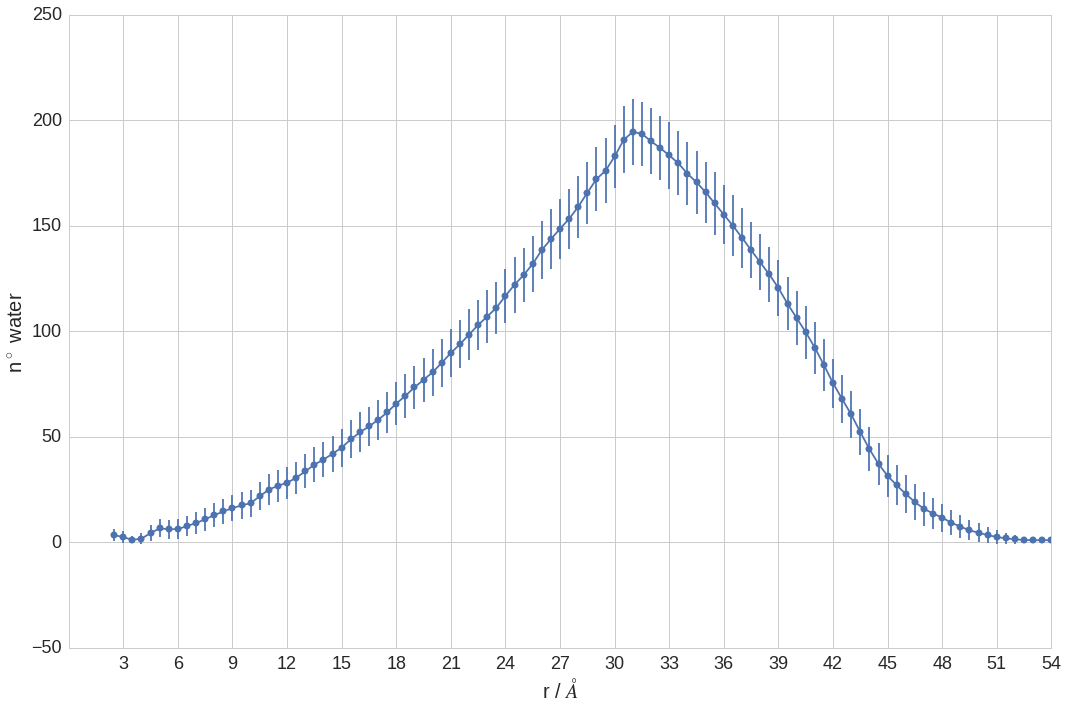

In [26]:
#plot the number of water molecules for each shell
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF
ax.errorbar(water_s,water_n,color=color[0],yerr=water_err,marker="o")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"n$^\circ$ water " ,fontsize=20)
#ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
plt.xticks(np.arange(3, 55, 3.0))
ax.set_xlim(0,54)
plt.tight_layout()
